In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('LaptopPrice.csv', encoding = "ISO-8859-1")

In [6]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.shape

(1303, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [11]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df['Inches'] = df['Inches'].astype('float32')

In [12]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [13]:
df["Cpu_Speed"] = df["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")
df["Cpu_Vender"] = df["Cpu"].str.split(" ").apply(lambda x: x[0])
df["Cpu_Type"] = df["Cpu"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1] == "Core" or x[0] == "AMD") else x[0]) )
df["Cpu_Type"] = df["Cpu_Type"].apply(lambda x: ' '.join(x))
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5


In [14]:
df['Cpu_Vender'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Vender, dtype: int64

<BarContainer object of 1303 artists>

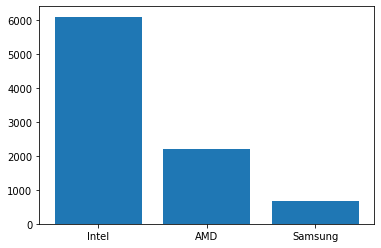

In [15]:
plt.bar(df['Cpu_Vender'],df['Price_euros'])

In [16]:
df.drop(columns=['Cpu'],inplace=True)

In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5


In [18]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [19]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [20]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df["Gpu_Type"] = df["Gpu"].str.split(" ").apply(lambda x: x[1:])
df["Gpu_Type"] = df["Gpu_Type"].apply(lambda x: ' '.join(x))
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650


In [21]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

<BarContainer object of 1303 artists>

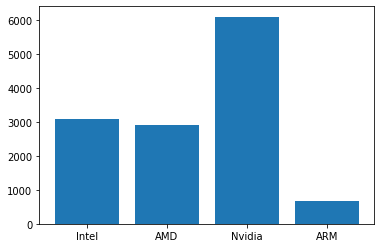

In [22]:
plt.bar(df['Gpu_brand'],df['Price_euros'])

In [23]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [24]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

In [26]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

In [27]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X-res'] = new[0]
df['Y-res'] = new[1]
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type,Touchscreen,IPS,X-res,Y-res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,0,1,IPS Panel Retina Display 2560,1600


In [28]:
df["X-res"] = df["X-res"].str.split(" ").apply(lambda x: x[-1])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type,Touchscreen,IPS,X-res,Y-res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,0,1,2560,1600


In [29]:
df['X-res'] = df['X-res'].astype('int')
df['Y-res'] = df['Y-res'].astype('int')

In [30]:
df['ppi'] = (((df['X-res']**2) + (df['Y-res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type,Touchscreen,IPS,X-res,Y-res,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,0,1,2560,1600,226.983001
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000,0,0,1440,900,127.677938
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620,0,0,1920,1080,141.211995
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455,0,1,2880,1800,220.534629
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,0,1,2560,1600,226.983001


In [31]:
df.drop(columns=['ScreenResolution','Inches','X-res','Y-res'],inplace=True)
df.head()

,Company,Product,TypeName,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type,Touchscreen,IPS,ppi
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,0,1,226.983001
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000,0,0,127.677938
2,HP,250 G6,Notebook,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620,0,0,141.211995
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455,0,1,220.534629
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,0,1,226.983001


In [32]:
df.corr()['Price_euros']

Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.473487
Name: Price_euros, dtype: float64

In [33]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [34]:
df["Memory"] = df["Memory"].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\MI\AppData\Local\Temp\ipykernel_12736\2393870926.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\MI\AppData\Local\Temp\ipykernel_12736\2393870926.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [35]:
df.head()

,Company,Product,TypeName,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type,Touchscreen,IPS,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,0,1,226.983001,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000,0,0,127.677938,0,0,0,128
2,HP,250 G6,Notebook,8,256 SSD,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620,0,0,141.211995,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455,0,1,220.534629,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,0,1,226.983001,0,256,0,0


In [36]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [37]:
df.drop(columns=['Memory','Hybrid'],inplace=True)
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_brand,Gpu_Type,Touchscreen,IPS,ppi,HDD,SSD,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,0,1,226.983001,0,128,0
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,1.8,Intel,Core i5,Intel,HD Graphics 6000,0,0,127.677938,0,0,128
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,2.5,Intel,Core i5,Intel,HD Graphics 620,0,0,141.211995,0,256,0
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,2.7,Intel,Core i7,AMD,Radeon Pro 455,0,1,220.534629,0,512,0
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,0,1,226.983001,0,256,0


In [38]:
df['Cpu_Speed'].value_counts()

2.5     290
2.7     165
2.8     165
1.6     133
2.3      86
1.8      78
2.6      76
2        67
1.1      53
2.4      52
2.9      21
3        19
2.0      19
1.2      15
1.44     12
2.2      11
1.5      10
1.3       6
3.6       5
0.9       4
3.1       3
2.1       3
2.50      3
1.9       2
1.60      1
3.2       1
1.0       1
1.92      1
2.70      1
Name: Cpu_Speed, dtype: int64

In [39]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

array([[<AxesSubplot:xlabel='Price_euros', ylabel='Price_euros'>,
        <AxesSubplot:xlabel='Ram', ylabel='Price_euros'>,
        <AxesSubplot:xlabel='ppi', ylabel='Price_euros'>],
       [<AxesSubplot:xlabel='Price_euros', ylabel='Ram'>,
        <AxesSubplot:xlabel='Ram', ylabel='Ram'>,
        <AxesSubplot:xlabel='ppi', ylabel='Ram'>],
       [<AxesSubplot:xlabel='Price_euros', ylabel='ppi'>,
        <AxesSubplot:xlabel='Ram', ylabel='ppi'>,
        <AxesSubplot:xlabel='ppi', ylabel='ppi'>]], dtype=object)

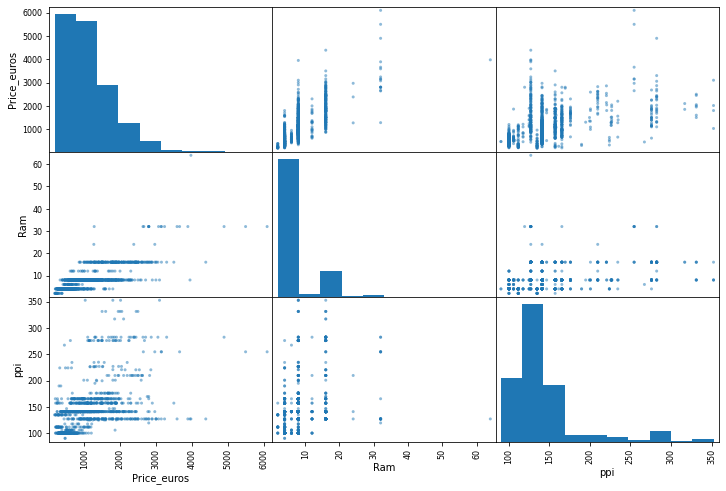

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["Price_euros","Ram","ppi"]
scatter_matrix(df[attributes],figsize=(12,8))

In [41]:
X_temp = df.drop(columns=['Price_euros'])
Y_temp = np.log(df['Price_euros'])
X_temp = X_temp.select_dtypes(exclude=['object'])

In [42]:
Y_temp

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1303, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_temp,Y_temp,test_size=0.15,random_state=2)

In [47]:
X_train

,Ram,Weight,Touchscreen,IPS,ppi,HDD,SSD,Flash_Storage
183,8,2.00,0,0,100.454667,0,128,0
699,4,2.10,0,1,141.211995,500,0,0
419,8,1.75,0,1,157.350512,0,256,0
997,4,2.40,0,0,100.454667,500,0,0
502,8,1.40,1,1,158.482535,0,256,0
...,...,...,...,...,...,...,...,...
466,4,2.20,0,0,100.454667,500,0,0
299,16,1.63,0,0,141.211995,0,512,0
493,8,2.20,0,0,100.454667,1000,0,0
527,8,2.20,0,0,100.454667,2000,0,0


In [44]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Rmse',rmse)

R2 score 0.8046104901097354
Rmse 0.27309670823347


In [46]:
import pickle
with open('LaptopPricePred','wb') as f:
    pickle.dump(model,f) 
with open('Data','wb') as f:
    pickle.dump(df,f)